In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('food_consumption.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


# Calculate the quartiles of the co2_emission column

In [10]:
# 1% - Percentile
# 10% - Decile
# 20% - Quintile
# 25% - Quartile (Only 3 - 25, 50, 75)
# 50% - Median

In [15]:
np.quantile(df['co2_emission'], [0, 0.25, 0.5, 0.75, 1])

[   0.        5.21     16.53     62.5975 1712.    ]


In [17]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column

In [18]:
np.quantile(df['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1])

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [19]:
# Calculate the deciles of co2_emission

In [24]:
np.quantile(df['co2_emission'], np.linspace(0, 1, 11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

# Calculate the variance and standard deviation of co2_emission 
# for each food_category by grouping and aggregating

In [4]:
# variance shows us how much values spread drom average/mean value
df.groupby('food_category')['co2_emission'].agg([np.var, np.std])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


In [31]:
# Create a histogram of co2_emission for the beef food_category and show the plot.

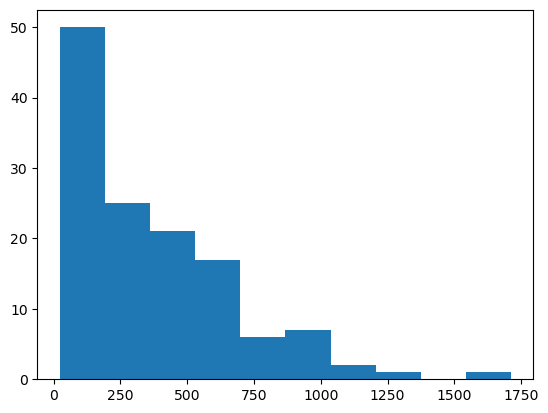

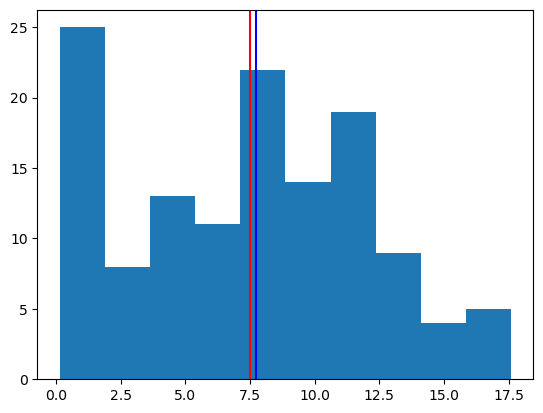

In [8]:
plt.hist(df[df['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(df[df['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.axvline(df[df['food_category'] == 'eggs']['co2_emission'].mean(), color = 'red')
plt.axvline(df[df['food_category'] == 'eggs']['co2_emission'].median(), color = 'blue')
plt.show()

# Finding outliers using IQR

In [ ]:
# Calculate the total co2_emission per country by grouping by country 
# and taking the sum of co2_emission. 
# Store the resulting DataFrame as emissions_by_country

In [40]:
emissions_by_country = df.groupby('country')['co2_emission'].sum()
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [1]:
# Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.
# Calculate the interquartile range of emissions_by_country and store it as iqr

In [45]:
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
q1, q3

iqr = q3 - q1
iqr
# or
# from scipy.stats import iqr
# iqr(emissions_by_country)

664.4925000000001

In [47]:
# Calculate the lower and upper cutoffs/thresholds for outliers of emissions_by_country,
# and store these as lower and upper
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
lower, upper

(-550.0787500000001, 2107.89125)

In [50]:
# Subset emissions_by_country to get countries with a total emission 
# greater than the upper cutoff or a total emission less than the lower cutoff.

 = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
outliers

country
Argentina    2172.4
Name: co2_emission, dtype: float64